##**First Graph**

In [2]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
df = pd.read_excel('drive/My Drive/Internship data/Baby_list_all.xlsx')
df

,Unnamed: 0,session_id,scan_age,scan_head_circumference,scan_number,radiology_score,sedation,participant_id,birth_age,birth_weight,gender,singleton
0,0,157600,42.142857,33.5,1,2,0,CC00549XX22,42.000000,3.685,Female,Single
1,1,163200,35.857143,27.0,1,5,0,CC00576XX16,28.857143,0.850,Male,Single
2,2,178200,42.142857,33.0,2,2,0,CC00576XX16,28.857143,0.850,Male,Single
3,3,67800,39.285714,32.5,1,2,0,CC00202XX04,38.571429,2.630,Male,Single
4,4,211101,40.571429,35.0,1,1,0,CC00720XX11,40.428571,3.950,Female,Single
...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,188400,40.142857,34.0,2,2,0,CC00617XX15,31.571429,1.640,Male,Single
486,486,65200,34.714286,29.6,1,3,0,CC00191XX11,32.714286,1.960,Male,Single
487,487,79600,40.428571,34.5,2,2,0,CC00191XX11,32.714286,1.960,Male,Single
488,488,183600,41.857143,35.0,1,1,0,CC00588XX20,38.428571,2.660,Male,Single


In [4]:
baby_90 = df[(df['scan_age']>=40) & (df['scan_age']<41)]

In [5]:
#Setting up the independent variables

vPreterm = baby_90[baby_90['birth_age']<32]
moderateLatePreterm = baby_90[(baby_90['birth_age']>=32) & (df['birth_age']<37)]
termBaby = baby_90[baby_90['birth_age']>37]

<ipython-input-5-54fe7e6b4cb1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moderateLatePreterm = baby_90[(baby_90['birth_age']>=32) & (df['birth_age']<37)]


In [6]:
#Average weight of babies in each category
import numpy as np

ave_vPreterm = np.mean(vPreterm['birth_weight'])
ave_moderateLatePreterm = np.mean(moderateLatePreterm['birth_weight'])
ave_termBaby = np.mean(termBaby['birth_weight'])

In [7]:
#Average scan head circumference in each category

ave_shc_vPreterm = np.mean(vPreterm['scan_head_circumference'])
ave_shc_moderateLatePreterm = np.mean(moderateLatePreterm['scan_head_circumference'])
ave_shc_termBaby = np.mean(termBaby['scan_head_circumference'])

<ErrorbarContainer object of 3 artists>

<Figure size 640x480 with 0 Axes>

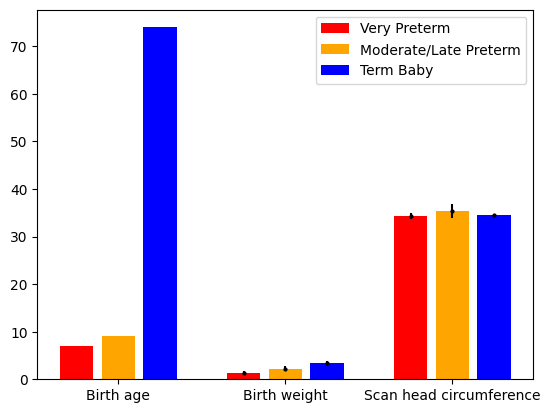

In [8]:
import matplotlib.pyplot as plt

plt.figure()
fig, ax1 = plt.subplots(1,1)
plt.bar([1, 5, 9], [len(vPreterm['birth_age']), ave_vPreterm, ave_shc_vPreterm], width=0.8, bottom=None, align='center', color='r', label='Very Preterm')
plt.bar([2, 6, 10], [len(moderateLatePreterm['birth_age']), ave_moderateLatePreterm, ave_shc_moderateLatePreterm], width=0.8, bottom=None, align='center', color='orange', label='Moderate/Late Preterm')
plt.bar([3, 7, 11], [len(termBaby['birth_age']), ave_termBaby, ave_shc_termBaby], width=0.8, bottom=None, align='center', color='blue', label='Term Baby')
plt.legend()

#Changing the x labels
x1 = [2,6, 10]
squad = ['Birth age','Birth weight','Scan head circumference']
ax1.set_xticks(x1)
ax1.set_xticklabels(squad, minor=False, rotation=0)

# Creation of an error bar
ebars = [np.std(vPreterm['birth_weight'].values), np.std(moderateLatePreterm['birth_weight'].values), np.std(termBaby['birth_weight'].values), np.std(vPreterm['scan_head_circumference'].values), np.std(moderateLatePreterm['scan_head_circumference'].values), np.std(termBaby['scan_head_circumference'].values)]
plt.errorbar([5, 6, 7, 9, 10, 11], [ave_vPreterm, ave_moderateLatePreterm, ave_termBaby, ave_shc_vPreterm, ave_shc_moderateLatePreterm, ave_shc_termBaby], yerr = ebars, fmt='o', color='black', markersize=2)



## **Second Graph**

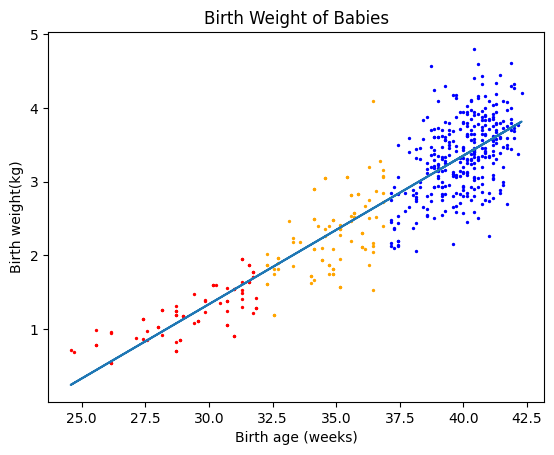

In [9]:
plt.figure
plt.subplot(111)
scatter_vPreterm = df[df['birth_age']<32]
scatter_moderateLatePreterm = df[(df['birth_age']>=32) & (df['birth_age']<37)]
scatter_termBaby = df[df['birth_age']>37]
plt.scatter(scatter_vPreterm['birth_age'], scatter_vPreterm['birth_weight'], s=2, color='r')
plt.scatter(scatter_moderateLatePreterm['birth_age'], scatter_moderateLatePreterm['birth_weight'], s=2, color='orange')
plt.scatter(scatter_termBaby['birth_age'], scatter_termBaby['birth_weight'], s=2, color='blue')
plt.title('Birth Weight of Babies')
plt.xlabel('Birth age (weeks)')
plt.ylabel('Birth weight(kg)')

a, b = np.polyfit(df['birth_age'].values, df['birth_weight'].values, 1)
plt.plot(df['birth_age'], a*(df['birth_age'])+b)

## **Third Graph**

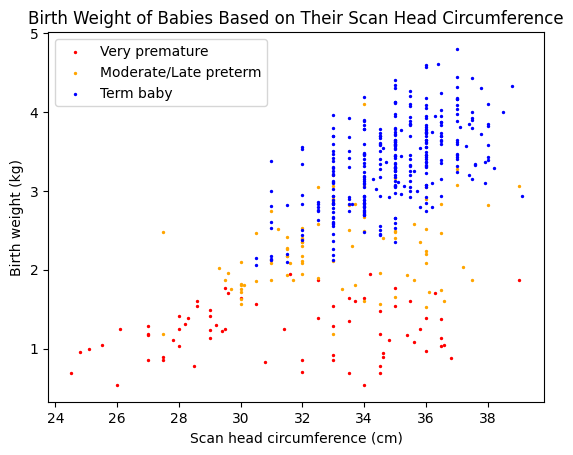

In [18]:
plt.figure()
plt.subplot(111)
plt.scatter(scatter_vPreterm['scan_head_circumference'], scatter_vPreterm['birth_weight'], s=2, color='r', label='Very premature')
plt.scatter(scatter_moderateLatePreterm['scan_head_circumference'], scatter_moderateLatePreterm['birth_weight'], s=2, color='orange', label='Moderate/Late preterm')
plt.scatter(scatter_termBaby['scan_head_circumference'], scatter_termBaby['birth_weight'], s=2, color='blue', label='Term baby')
plt.legend()
plt.title('Birth Weight of Babies Based on Their Scan Head Circumference')
plt.xlabel('Scan head circumference (cm)')
plt.ylabel('Birth weight (kg)')
plt.savefig('drive/My Drive/Internship data/scan head circumference data', bbox_inches='tight', pad_inches=0)

# **Fourth Graph**